In [23]:
%matplotlib inline
import numpy as np                                                         
from matplotlib.pyplot import *                                            
import os                                                                  
import sys    
import pickle
caffe_root = os.environ["CAFFE_ROOT"]   
os.chdir(caffe_root)




In [24]:
bias_default = pickle.load(open('2_results/kmeans/alexnet/bias_snapshot/bias%d'%1))
bias = {}
num = 1800
layers = bias_default.keys()
for layer in layers:
    bias[layer] = np.zeros((num,) +  bias_default[layer].shape)
for i in range(0, num):
    bias_default = pickle.load(open('2_results/kmeans/alexnet/bias_snapshot/bias%d'%(i+1)))
    for layer in layers:
        bias[layer][i] = bias_default[layer]

In [25]:
bias['fc6'].shape
np.max(bias['fc6'], axis=1).shape

(1800,)

conv1


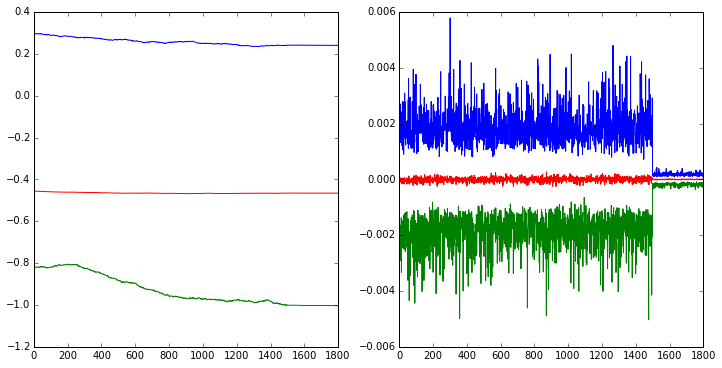

conv2


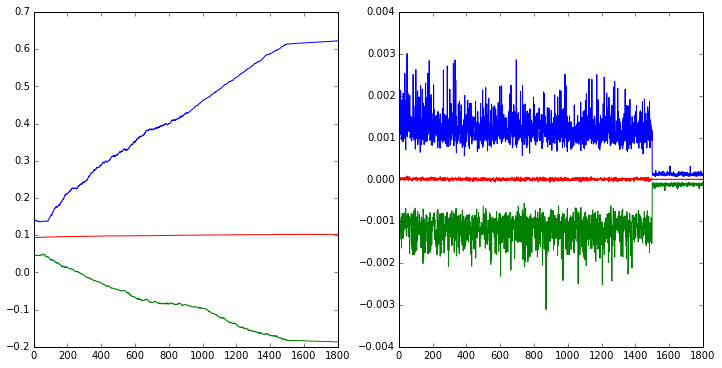

conv3


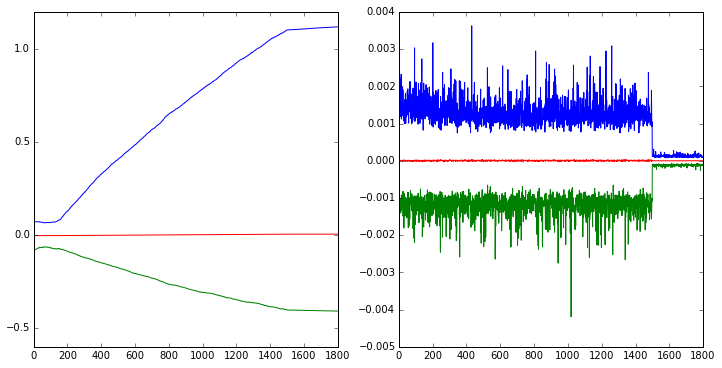

conv4


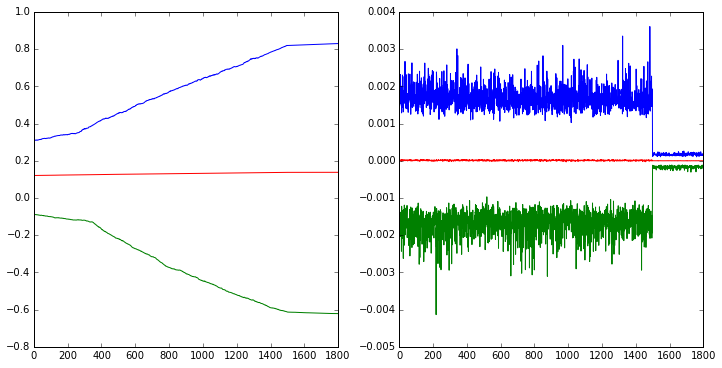

conv5


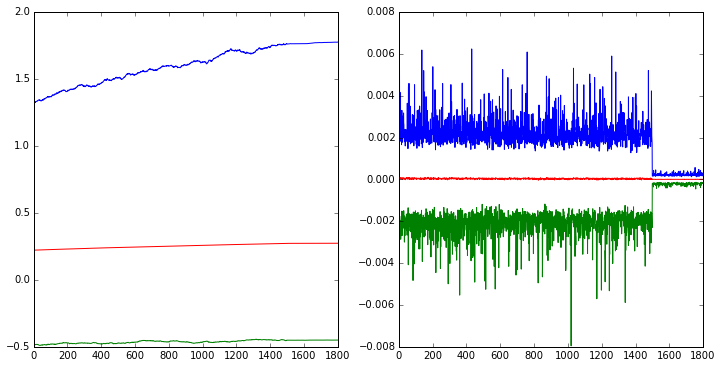

fc6


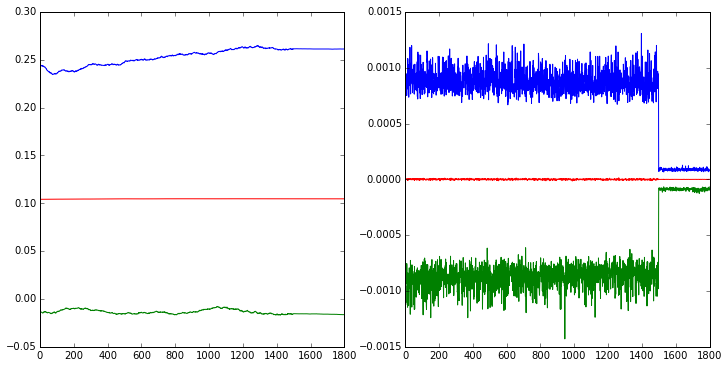

fc7


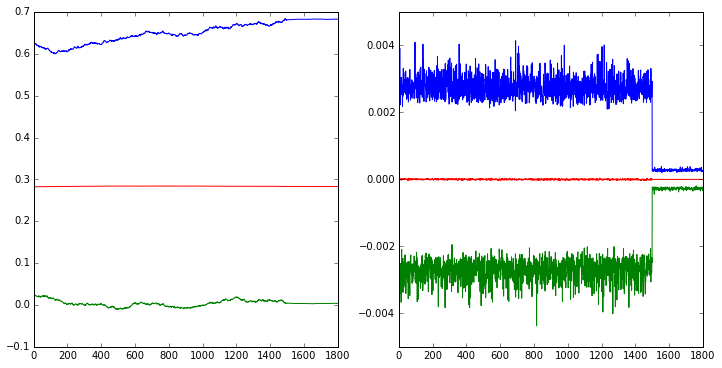

fc8


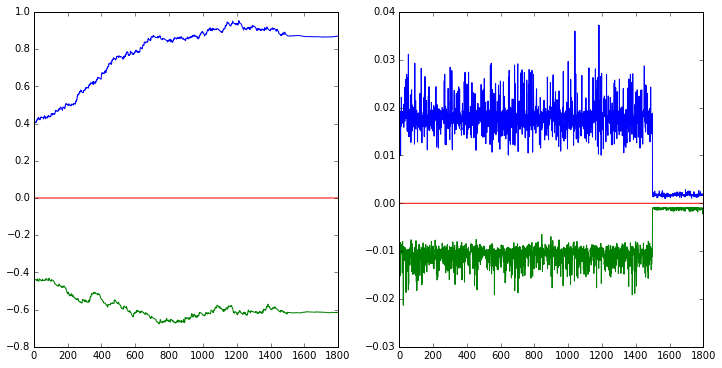

In [26]:
layers = ['conv1', 'conv2','conv3','conv4','conv5','fc6','fc7','fc8']
for layer in layers:
    print layer
    bias_max = np.max(bias[layer],axis=1)
    bias_min = np.min(bias[layer],axis=1)
    bias_mean = np.mean(bias[layer],axis=1)
    
    bias_d = bias[layer][1:] - bias[layer][:-1]
    bias_d_max =   np.max(bias_d,axis=1)
    bias_d_min =   np.min(bias_d,axis=1)
    bias_d_mean = np.mean(bias_d,axis=1)
    
    figure(figsize=(12,6))
    subplot(121)
    plot(bias_max)
    plot(bias_min)
    plot(bias_mean, 'r')
    subplot(122)
    plot(bias_d_max)
    plot(bias_d_min)
    plot(bias_d_mean, 'r')
    show()